# SVC (Support Vector Classifier) in SVM (Support Vector Machine) Classification for Heart Disease

SVM is used for both Regression and Classification problems. We are using SVM as a classifier by importing SVC. I am using a heart disease prediction dataset from Kaggle. 

URL for kaggle Dataset : https://www.kaggle.com/ronitf/heart-disease-uci

In [172]:
#Import all necessary Libs
import numpy as np
import pandas as pd

#For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline

#For Counter lib -- For checking the counts of classification cols
from collections import Counter

#For Train Test Split
from sklearn.model_selection import train_test_split

#For Lableling the dataset cols
from sklearn.preprocessing import LabelEncoder

#For Feature Scaling
from sklearn.preprocessing import StandardScaler

#For Handling imbalanced dataset
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE


#For importing Support Vector Classifier
from sklearn.svm import SVC

#For Error Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

#For Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

#For Evaluating the final Model itself
from eli5 import show_weights
from eli5.sklearn import PermutationImportance

In [69]:
#Import Dataset from the corresponding path
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Let's have an overview on the data set:

It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,

age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

target: Heart disease (0 = no, 1 = yes)








#### Let's change the column names to understand the data clearly

In [70]:
#Lets Rename the Cols
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [71]:
#checking the info of the dataset --> It has 303 Rows and 14 Cols
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

# EDA (Exploratory Data Analysis) & Feature Engineering

### NULL Check

In [72]:
#Checking the Nulls in Dataset 
df.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

So, we dont have any NULL's in the dataset. 

If we find any NULL's we need to either remove it or updating it with its mean, median or mode values. Removing records will give you data loss. So, its good to fill NULL values with either mean, median or mode.

Pandas Methods : fillna, dropna

### Checking for Duplicates

In [73]:
#Identifying Duplicates
df.duplicated().sum()

1

In [74]:
#Removing Duplicate Data
df.drop_duplicates(inplace=True)
#checking for duplicates again
df.duplicated().sum()

0

We have identified a duplicate data and removed it.

### Outlier detection and Analysis


lets do some univariate analysis on features which has continuoes values.

<AxesSubplot:xlabel='age'>

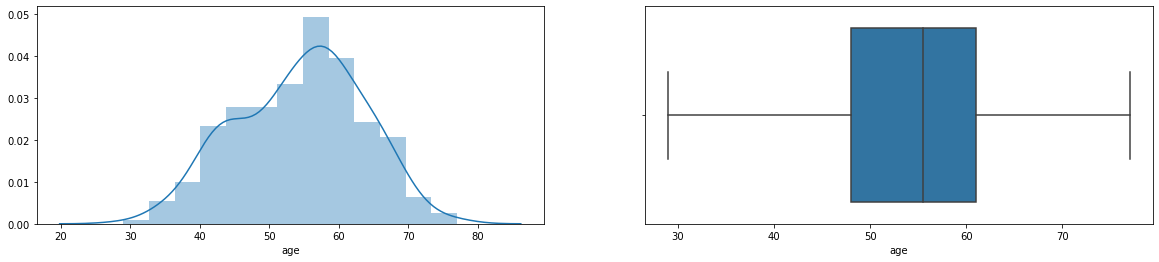

In [75]:
#Univariate analysis age.
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(df['age'])
f.add_subplot(1,2,2)
sns.boxplot(df['age'])

So Clearly age follows Normal distribution and according to Box plot, it has no outliers

<AxesSubplot:xlabel='resting_blood_pressure'>

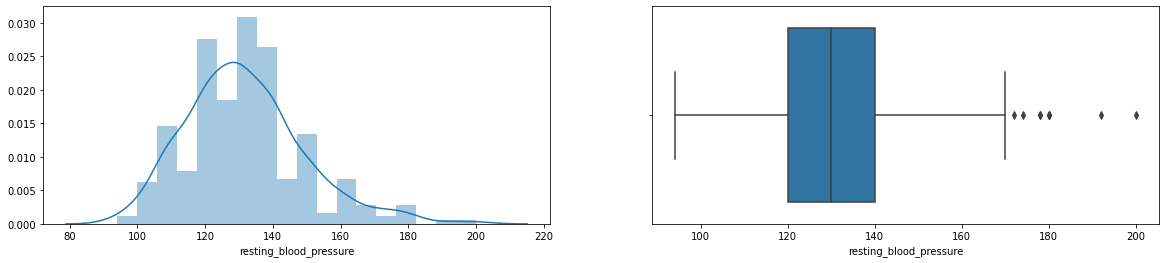

In [42]:
#Univariate analysis Blood Pressure.
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(df['resting_blood_pressure'])
f.add_subplot(1,2,2)
sns.boxplot(df['resting_blood_pressure'])

'Blood Pressure' follows Normal distribution and with the box plot it has some outliers. But we are working on identifying the Heart attack blood puressure is the important dictator.

<AxesSubplot:xlabel='max_heart_rate_achieved'>

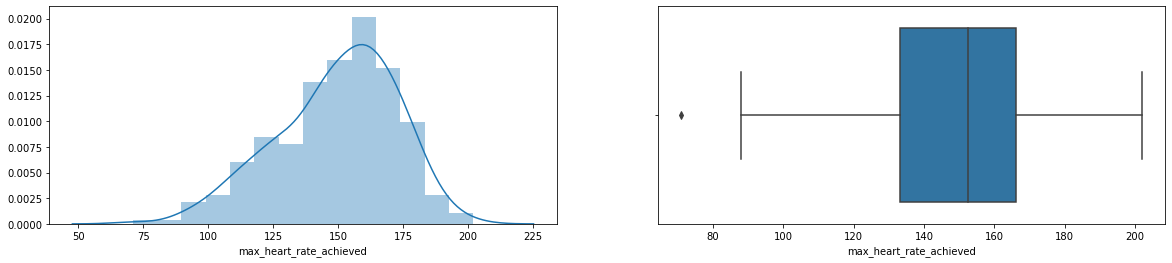

In [44]:
#Univariate analysis max_heart_rate_achieved.
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(df['max_heart_rate_achieved'])
f.add_subplot(1,2,2)
sns.boxplot(df['max_heart_rate_achieved'])

It is also following Normal distribution and according to Box plot, it has one outlier and we can deal with this later

### Handle outliers with SVMs
There are 2 variants of SVMs. They are hard-margin variant of SVM and soft-margin variant of SVM.

The hard-margin variant of SVM does not deal with outliers. In this case, we want to find the hyperplane with maximum margin such that every training point is correctly classified with margin at least 1. This technique does not handle outliers well.

Another version of SVM is called soft-margin variant of SVM. In this case, we can have a few points incorrectly classified or classified with a margin less than 1. But for every such point, we have to pay a penalty in the form of C parameter, which controls the outliers. Low C implies we are allowing more outliers and high C implies less outliers.

The message is that since the dataset contains outliers, so the value of C should be high while training the model

 ###  Convert Categorical features to numerical values

In [76]:
#Let's have a look on the data
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


So, we could able to see that all the categorical features are already converted to numerical values. If not, we can use LabelEncoder or One hot encoding techniques to make the conversion

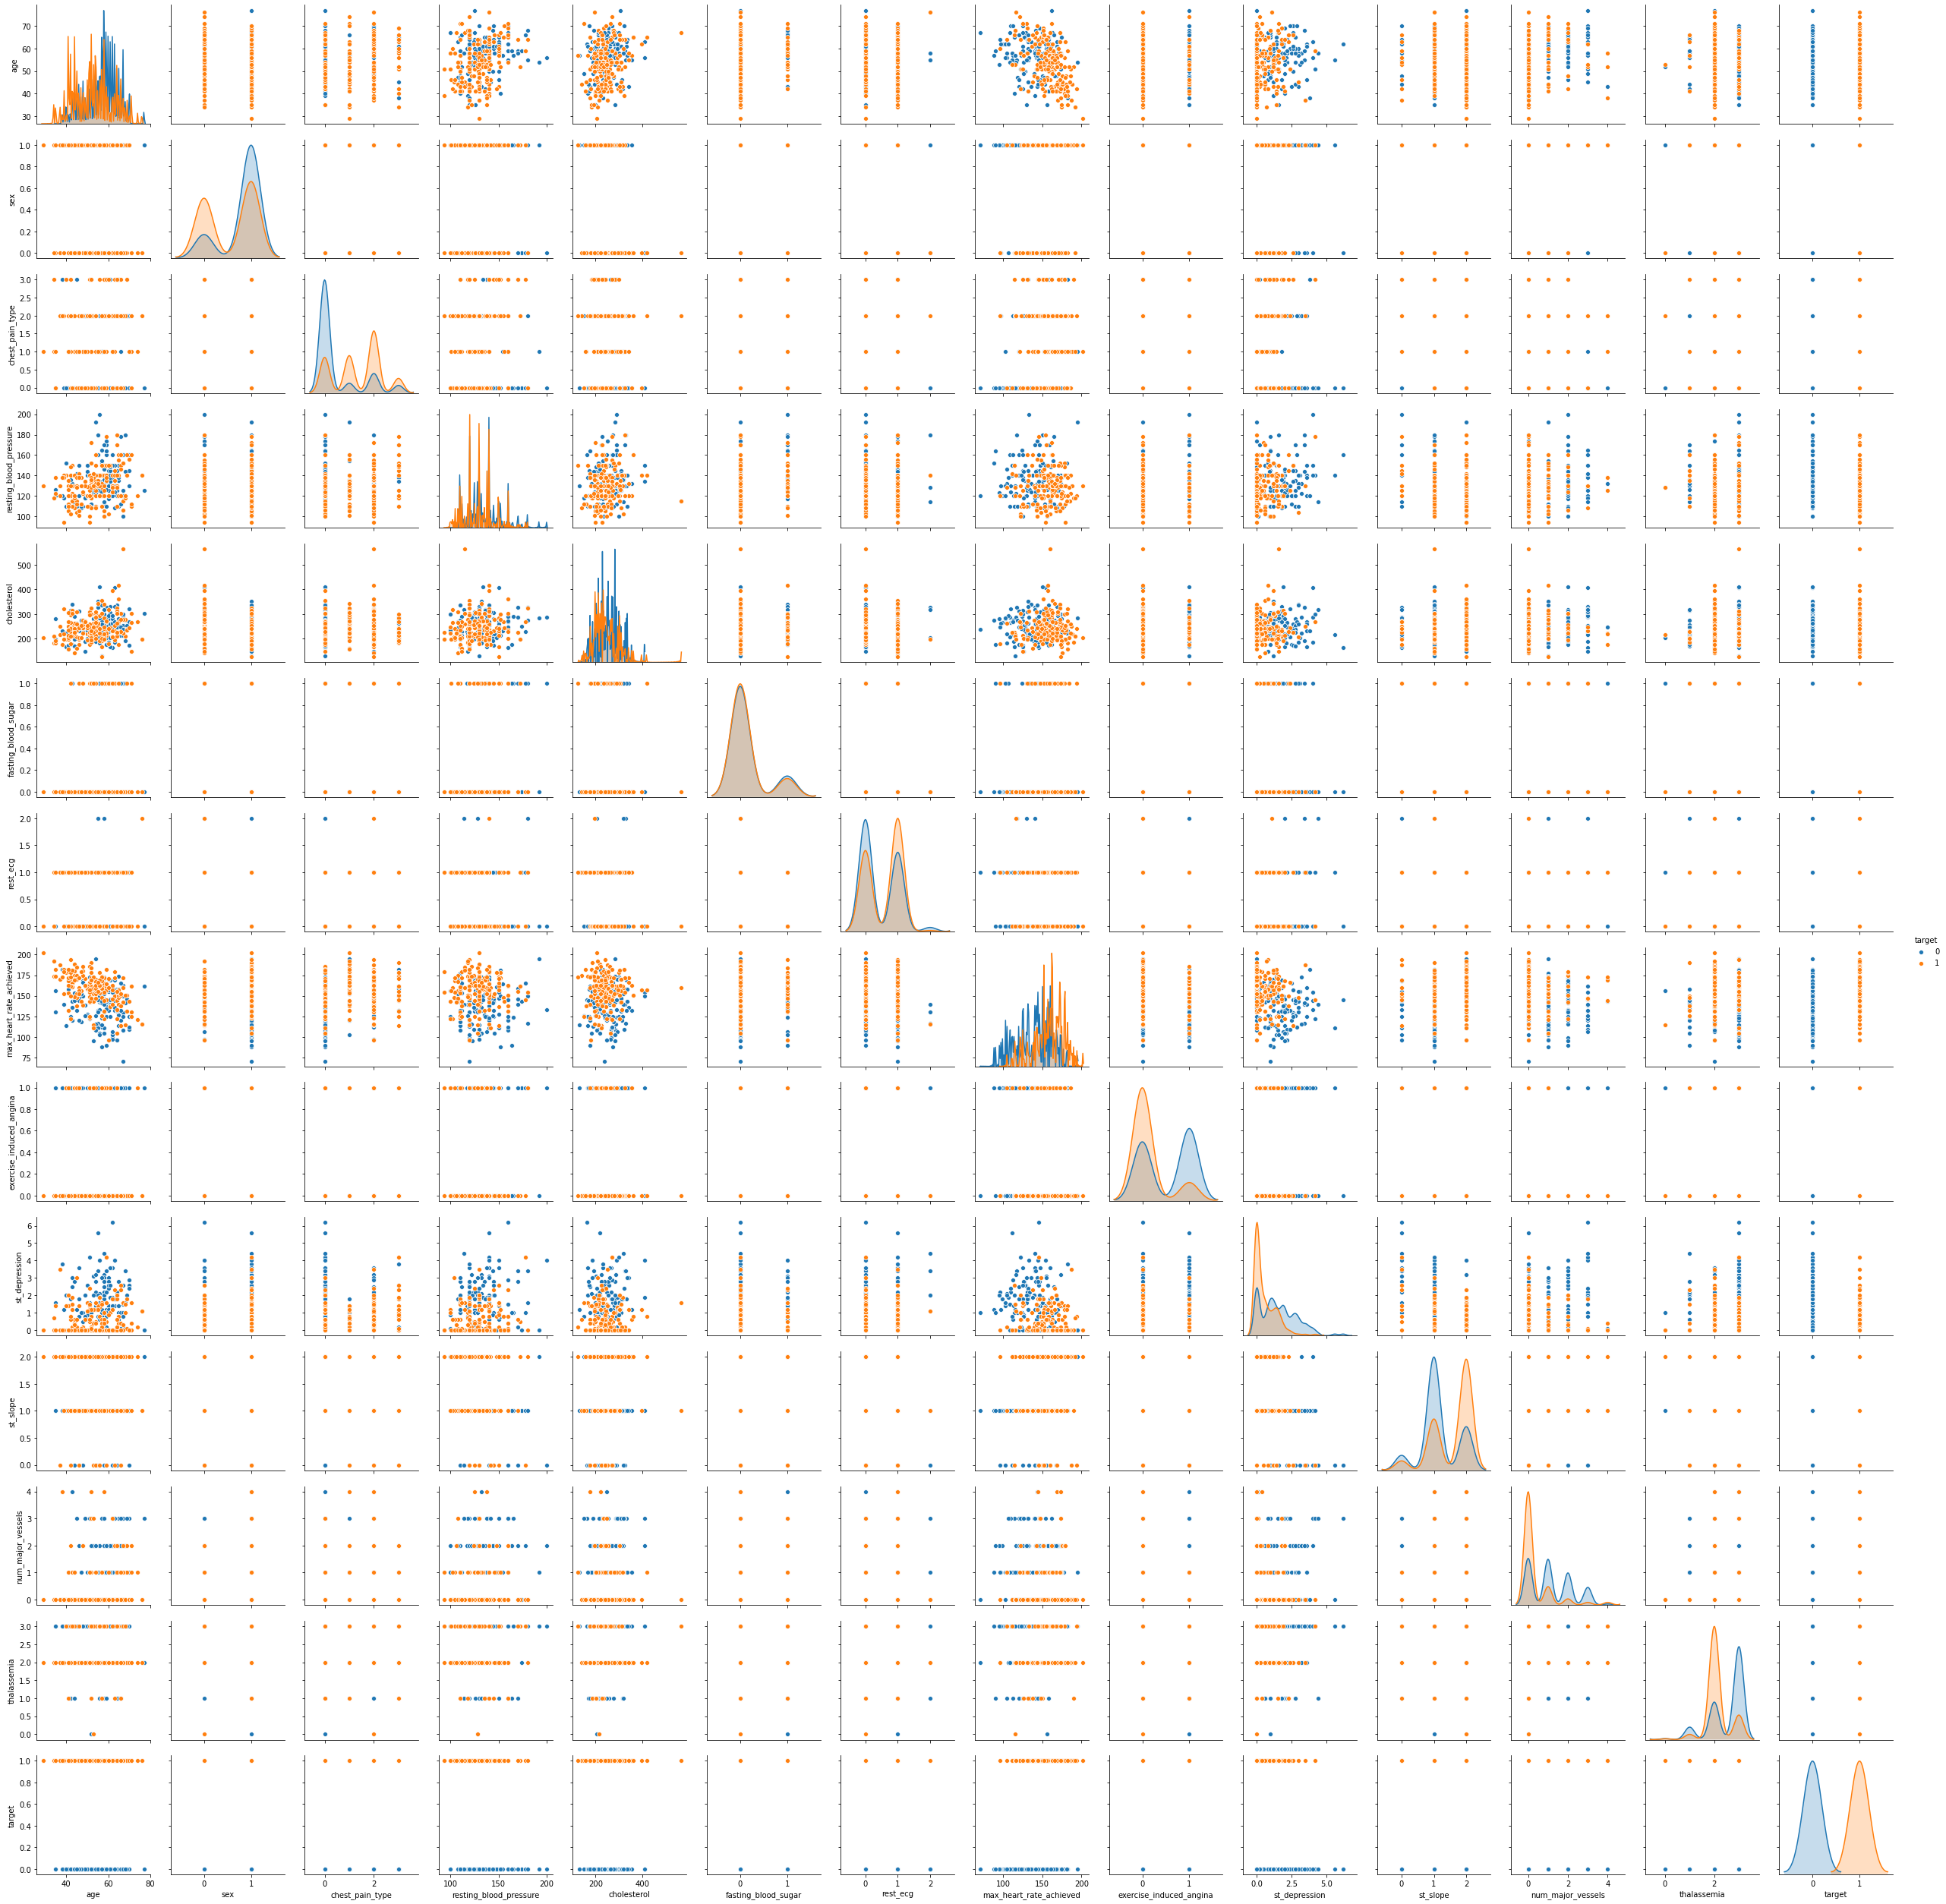

In [77]:
#Let's use pairplot to visualize the relation between features
sns.pairplot(df,hue='target', diag_kws={'bw': 0.2})

# Feature Selection



As we can see from the above pair plot, all the features are necessary to drive in a conclusion.

In [78]:
#Defining X form the Feature Dataset
X = df.drop(['target'], axis=1)
X.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [79]:
y = df['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

# Train Test Split



For Train & Test split, we are going to use 'train_test_split' from 'sklearn.modelselection'

In [80]:
#Spliting Data for Training and testing
#please import 'from sklearn.model_selection import train_test_split' if not 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [81]:
#Let's check the count of X_Train
X_train.count()

age                        226
sex                        226
chest_pain_type            226
resting_blood_pressure     226
cholesterol                226
fasting_blood_sugar        226
rest_ecg                   226
max_heart_rate_achieved    226
exercise_induced_angina    226
st_depression              226
st_slope                   226
num_major_vessels          226
thalassemia                226
dtype: int64

In [82]:
#Let's check the count of y_Train
y_train.count()

226

In [83]:
#Lets have our columns of X
cols = X_train.columns
cols

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia'],
      dtype='object')

# Handling Imbalanced Dataset

<AxesSubplot:xlabel='target', ylabel='count'>

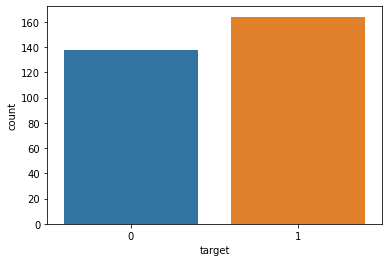

In [84]:
#Target Classification
sns.countplot(df['target'])

In [85]:
#For Counter lib -- Import it, if haven't done
from collections import Counter


#Lets check the Train Data for Sampling
print("'y' Samples : " , Counter(y_train))
print("X_train Shape: " , X_train.shape)
print("y_train Shape: " , y_train.shape)

'y' Samples :  Counter({1: 123, 0: 103})
X_train Shape:  (226, 13)
y_train Shape:  (226,)


We have arounf 140 negative samples and 160 positive samples. Its almost a balanced data. Below are the things need to do, incase of Imbalanced data.

There are 3 major techniques for balancing the imbalanced Dataset

1) Undersampling - It will reduce the number of majority data to match the minority data. For eg: In our dependent feature, if we have '1000' Positive values and '100' Negative values, It will downsample the 'Postive' values to '100' to match the number of 'Negative' values. If we use this technique, there is a chance of missing the large part of actual data.

2) Oversampling - It will increase the number of minority data to match the majority data by duplicating.For eg: In our dependent feature, if we have '1000' Positive values and '100' Negative values, It will create duplicated or oversample the 'Negative' values from 100 to 1000 to match the 'Positive' values. If we use this technique, there is a chance of getting overfited model.

3) SMOTE (Synthetic Minority Oversampling Technique) - It will increase the number of minority data to match the majority data by Synthetically taking the average of Minority data.For eg: In our dependent feature, if we have '1000' Positive values and '100' Negative values, It will create Synthetic average for the 'Negative' values from 100 to 1000 to match the 'Positive' values. It will not duplicate the values.

I am going to use 'SMOTE' in this case

#### Note that you need to use these techniques only for the Training set and not the Test set

# Feature Scaling

In [86]:
#Scaling the features to fit into the model
from sklearn.preprocessing import StandardScaler

#Feature Scaling
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [87]:
# Fitting the array into dataframe
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [88]:
#Let's check Scaled X_train
X_train.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,0.054756,0.733086,-0.967005,0.051247,2.026350,-0.383677,0.887333,-0.779602,1.524313,0.172218,-0.665549,0.309516,1.127900
1,1.040364,0.733086,0.950040,-0.342308,1.196858,-0.383677,0.887333,-0.824652,1.524313,0.712789,-0.665549,-0.689779,1.127900
2,0.273780,0.733086,0.950040,1.063243,-2.253076,2.606358,0.887333,1.067443,-0.656033,-0.728736,0.969387,0.309516,1.127900
3,1.259389,0.733086,-0.008482,1.625464,0.009176,-0.383677,0.887333,-1.320201,1.524313,-0.908926,-0.665549,2.308108,-2.204197
4,1.806949,-1.364097,0.950040,-1.185638,0.367366,2.606358,-0.986847,-0.869702,-0.656033,-0.908926,0.969387,0.309516,-0.538149


In [89]:
#Let's check Scaled X_test
X_test.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,0.054756,0.733086,-0.967005,0.051247,2.026350,-0.383677,0.887333,-0.779602,1.524313,0.172218,-0.665549,0.309516,1.127900
1,1.040364,0.733086,0.950040,-0.342308,1.196858,-0.383677,0.887333,-0.824652,1.524313,0.712789,-0.665549,-0.689779,1.127900
2,0.273780,0.733086,0.950040,1.063243,-2.253076,2.606358,0.887333,1.067443,-0.656033,-0.728736,0.969387,0.309516,1.127900
3,1.259389,0.733086,-0.008482,1.625464,0.009176,-0.383677,0.887333,-1.320201,1.524313,-0.908926,-0.665549,2.308108,-2.204197
4,1.806949,-1.364097,0.950040,-1.185638,0.367366,2.606358,-0.986847,-0.869702,-0.656033,-0.908926,0.969387,0.309516,-0.538149


# Model Creation with Linear Kernel Hyperparams

In [152]:
# import SVC classifier
from sklearn.svm import SVC

# instantiate classifier with default hyperparameters
svc=SVC(kernel = 'linear', random_state=42)

#Training the model.
svc.fit(X_train, y_train)

#Predict test data set.
y_pred = svc.predict(X_test)

# Error Metrics for model with Linear kernel Hyperparams

In [153]:
#Checking performance our model with Confusion Metrics
print(confusion_matrix(y_test,y_pred))

[[29  6]
 [ 7 34]]


In [154]:
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        35
           1       0.85      0.83      0.84        41

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76



In [159]:
#Checking performance our model with Recall
recall_score(y_test, y_pred)

0.8292682926829268

In [160]:
#Checking performance our model with accuracy score 
accuracy_score(y_test, y_pred)

0.8289473684210527

In [161]:
#Checking performance our model with F1 score 
f1_score(y_test, y_pred)

0.8395061728395061

As we can see our model is performing good. But as we are identifying the Heart Disease, we need to reduce the number of False Negative in the dataset. As you can see from the confusion metrics we have '5' False negative values. 

What if a patient has heart disease, but there is no treatment given to him/her because our model predicted so? That is a situation we would like to avoid! So, we need to improve our Recall score, which is currently at 88. We will try to reduce that by opting Hyperparameter Tunning.

# Helper Functions for Model Evaluation

Creating a helper functions for evaluation of the model

In [162]:
#For Model Evalution
def evaluate_model(svc_classifier):
    print("Train Accuracy :", accuracy_score(y_train, svc_classifier.predict(X_train)))
    print()
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, svc_classifier.predict(X_train)))
    print()
    print("Recall Score:")
    print(recall_score(y_train, svc_classifier.predict(X_train)))
    print()
    print("f1 Score:")
    print(f1_score(y_train, svc_classifier.predict(X_train)))
    print()
    print("Train Classification Report:")
    print(classification_report(y_train, svc_classifier.predict(X_train)))
    print()
    print("-"*100)
    print("Test Accuracy :", accuracy_score(y_test, svc_classifier.predict(X_test)))
    print()
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, svc_classifier.predict(X_test)))
    print()
    print("Recall Score:")
    print(recall_score(y_train, svc_classifier.predict(X_train)))
    print()
    print("F1 Score:")
    print(f1_score(y_train, svc_classifier.predict(X_train)))
    print()
    print("Train Classification Report:")
    print(classification_report(y_test, svc_classifier.predict(X_test)))

# Hyperparameter Tuning using GridsearchCV

Lets use GridsearchCV for tuning our Hyperparameters.

In [163]:
#For Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

#List Hyperparameters that we want to tune.
C = [1,10,100,1000]
kernel = ["rbf"]

#Convert to dictionary
hyperparameters = dict(C=C, kernel=kernel)

#Create new DT object
svc = SVC(random_state=42)

#Use GridSearch 
clf = GridSearchCV(estimator=svc, param_grid=hyperparameters, cv=5, scoring='recall', n_jobs=-1)
#CV - Cross Validation no - It will consider 5 mutually exclusive sets
#n_jobs = The number of parallel jobs to run for neighbors search. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors
#Scoring -> we are using Recall for scoring


#Fit the model
best_model = clf.fit(X_train, y_train)

In [164]:
# find the best score
best_model.best_score_

0.8383333333333333

In [165]:
# get the hyperparameters with the best score
best_model.best_params_

{'C': 1, 'kernel': 'rbf'}

# Re-Training and Evaluating the model with GridsearchCV Hyperparameters

In [166]:
#SVC Algo
svc_with_tuned_param = SVC(kernel='rbf', C = 1.0, random_state=42)

#Training the model.
svc_with_tuned_param.fit(X_train, y_train)

#Predict test data set.
y_pred = svc_with_tuned_param.predict(X_test)

In [167]:
#Metrics for Tuned Model
evaluate_model(svc_with_tuned_param)

Train Accuracy : 0.911504424778761

Train Confusion Matrix:
[[ 90  13]
 [  7 116]]

Recall Score:
0.943089430894309

f1 Score:
0.9206349206349207

Train Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       103
           1       0.90      0.94      0.92       123

    accuracy                           0.91       226
   macro avg       0.91      0.91      0.91       226
weighted avg       0.91      0.91      0.91       226


----------------------------------------------------------------------------------------------------
Test Accuracy : 0.868421052631579

Test Confusion Matrix:
[[30  5]
 [ 5 36]]

Recall Score:
0.943089430894309

F1 Score:
0.9206349206349207

Train Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        35
           1       0.88      0.88      0.88        41

    accuracy                           0.87        76
   macr

We could see some improvements in the score. We can adopt various tunning options to tune the Hyperparams

# The Model Explanation

This is not an error metric. We are evoluationg the model we builded, and trying to identify which feature has more weigths by using eli5 and PermutationImportance

In [171]:
# importing eli5 libs-- use 'pip install eli5' if you haven't installed
from eli5 import show_weights
from eli5.sklearn import PermutationImportance

In [176]:
#Permutation Importance
perm = PermutationImportance(svc_with_tuned_param, scoring = 'recall' ,random_state=42).fit(X_test, y_test)
perm

PermutationImportance(estimator=SVC(random_state=42), random_state=42,
                      scoring='recall')

In [199]:
eli5.show_weights(perm, feature_names = ['age','sex','chest_pain_type','resting_blood_pressure','cholesterol','fasting_blood_sugar',
 'rest_ecg','max_heart_rate_achieved','exercise_induced_angina','st_depression','st_slope','num_major_vessels','thalassemia'])

Weight,Feature
0.1122 ± 0.0390,num_major_vessels
0.0780 ± 0.1492,thalassemia
0.0537 ± 0.0478,chest_pain_type
0.0439 ± 0.0365,st_depression
0.0341 ± 0.0390,max_heart_rate_achieved
0.0341 ± 0.0239,sex
0.0098 ± 0.0239,rest_ecg
0 ± 0.0000,exercise_induced_angina
0 ± 0.0000,age
-0.0049 ± 0.0195,fasting_blood_sugar


# Conclusion

The model is genralized and working well with high score. But, I am not sure about the model performance and impact on the Large dataset. However, it's allowed us to create a simple model. At start, I thought cholesterol and blood_pressure will impact the model. But the dataset didn't showed that. Instead 'num_major_vessels', 'thalassemia' and 'chest_pain_type' given more importance. 